<a href="https://www.kaggle.com/code/ziadhamadafathy/predict-car-price-acc-81?scriptVersionId=107663056" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/car-price-prediction-challenge/car_price_prediction.csv


**Preparing Data**

In [2]:
df = pd.read_csv('../input/car-price-prediction-challenge/car_price_prediction.csv')
df

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4


**Information about data**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

**Describe for numerical data**

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,19237.0,4.557654e+07,936591.422799,20746880.0,45698374.0,45772308.0,45802036.0,45816654.0
Price,19237.0,1.855593e+04,190581.269684,1.0,5331.0,13172.0,22075.0,26307500.0
Prod. year,19237.0,2.010913e+03,5.668673,1939.0,2009.0,2012.0,2015.0,2020.0
Cylinders,19237.0,4.582991e+00,1.199933,1.0,4.0,4.0,4.0,16.0
Airbags,19237.0,6.582627e+00,4.320168,0.0,4.0,6.0,12.0,16.0


**Check miss values**

In [5]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
ID,0,0.0
Price,0,0.0
Color,0,0.0
Wheel,0,0.0
Doors,0,0.0
Drive wheels,0,0.0
Gear box type,0,0.0
Cylinders,0,0.0
Mileage,0,0.0
Engine volume,0,0.0


In [6]:
df.drop(columns=['ID'], inplace=True)

In [7]:
categorical = df.select_dtypes(include = "object").columns
for i in range(0, len(categorical)):
    print(df[categorical[i]].value_counts())
    print('****************************************\n')

-       5819
765      486
891      461
639      410
640      405
        ... 
3156       1
2908       1
1279       1
1719       1
1901       1
Name: Levy, Length: 559, dtype: int64
****************************************

HYUNDAI          3769
TOYOTA           3662
MERCEDES-BENZ    2076
FORD             1111
CHEVROLET        1069
                 ... 
TESLA               1
PONTIAC             1
SATURN              1
ASTON MARTIN        1
GREATWALL           1
Name: Manufacturer, Length: 65, dtype: int64
****************************************

Prius                    1083
Sonata                   1079
Camry                     938
Elantra                   922
E 350                     542
                         ... 
Feroza                      1
C-MAX C-MAX                 1
X1 4X4                      1
Land Cruiser Prado RX       1
Prius C aqua                1
Name: Model, Length: 1590, dtype: int64
****************************************

Sedan          8736
Jeep           5

**Some practice on feature engineering**

In [8]:
df['Levy'] = df['Levy'].replace('-', '0')
df['Levy'] = df['Levy'].astype(int)

In [9]:
Mileage = list(df['Mileage'])
new_Mileage = [item.split(' ', 1)[0] for item in Mileage]
df['Mileage'] = [int(num) for num in new_Mileage]

In [10]:
drive_wheel = {'Front':0, 'Rear':1, '4x4':2}
df['Drive wheels'] = df['Drive wheels'].replace(drive_wheel)

In [11]:
cat_col = df.select_dtypes(include=['object']).columns
encoder = preprocessing.LabelEncoder()
for i in range(0, len(cat_col)):
    df[cat_col[i]] = encoder.fit_transform(df[cat_col[i]])

In [12]:
df

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,13328,1399,32,1242,2010,4,1,2,63,186005,6.0,0,2,1,0,12,12
1,16621,1018,8,658,2011,4,0,5,56,192000,6.0,2,2,1,0,1,8
2,8467,0,21,684,2006,3,0,5,22,200000,4.0,3,0,1,1,1,2
3,3607,862,16,661,2011,4,1,2,46,168966,4.0,0,2,1,0,14,0
4,11726,446,21,684,2014,3,1,5,22,91901,4.0,0,0,1,0,12,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,8467,0,36,385,1999,1,1,0,37,300000,4.0,1,1,0,0,12,5
19233,15681,831,23,1334,2011,9,1,5,44,161600,4.0,2,0,1,0,11,8
19234,26108,836,23,1442,2010,4,1,1,36,116365,4.0,0,0,1,0,7,4
19235,5331,1288,8,456,2007,4,1,1,36,51258,4.0,0,0,1,0,1,4


**Visualizing for cars' prices**

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Price'>

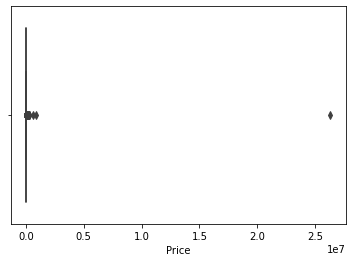

In [13]:
sns.boxplot(df['Price'])

**Remove outliers**

In [14]:
df.drop(df[(df['Price'] < 200) | (df['Price'] > 80000)].index, inplace=True)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Price'>

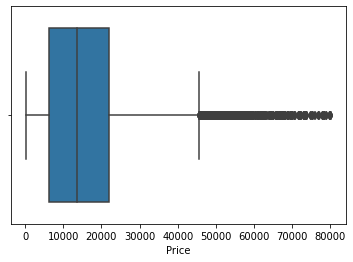

In [15]:
sns.boxplot(df['Price'])

In [16]:
df

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,13328,1399,32,1242,2010,4,1,2,63,186005,6.0,0,2,1,0,12,12
1,16621,1018,8,658,2011,4,0,5,56,192000,6.0,2,2,1,0,1,8
2,8467,0,21,684,2006,3,0,5,22,200000,4.0,3,0,1,1,1,2
3,3607,862,16,661,2011,4,1,2,46,168966,4.0,0,2,1,0,14,0
4,11726,446,21,684,2014,3,1,5,22,91901,4.0,0,0,1,0,12,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,8467,0,36,385,1999,1,1,0,37,300000,4.0,1,1,0,0,12,5
19233,15681,831,23,1334,2011,9,1,5,44,161600,4.0,2,0,1,0,11,8
19234,26108,836,23,1442,2010,4,1,1,36,116365,4.0,0,0,1,0,7,4
19235,5331,1288,8,456,2007,4,1,1,36,51258,4.0,0,0,1,0,1,4


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

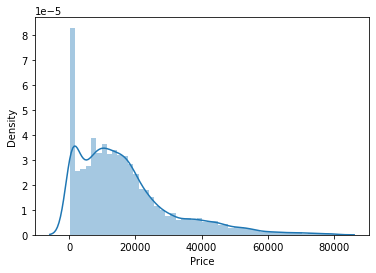

In [17]:
sns.distplot(df['Price'])

**Correlation among features**

<AxesSubplot:>

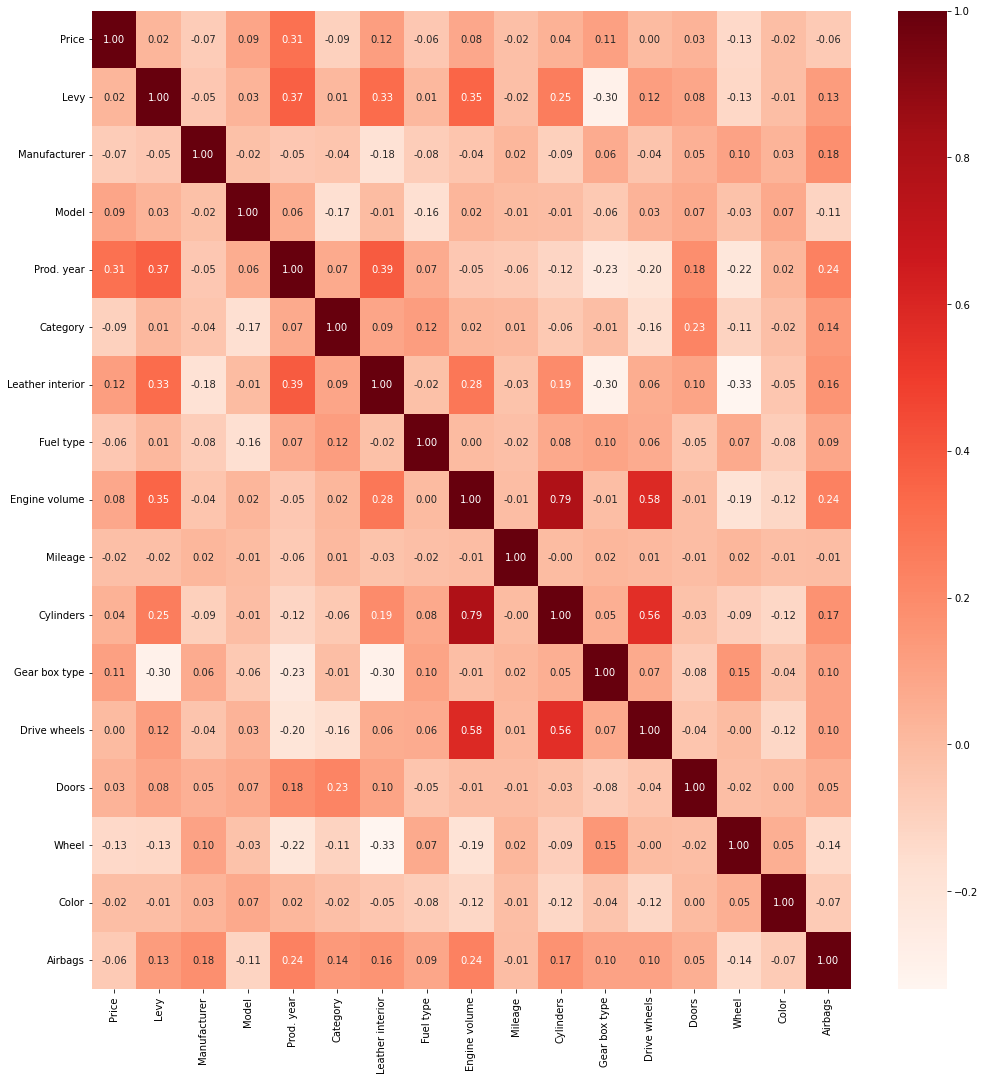

In [18]:
plt.figure(figsize=(17,18))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds,fmt='.2f')

In [19]:
X = df.drop(columns=['Price'])
y = df['Price']

In [20]:
FeatureSelection = SelectKBest(score_func= chi2 ,k=15)
x = FeatureSelection.fit_transform(X, y)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.9, random_state=44, shuffle =True)

**Rnadom Forest Regressor**

In [22]:
RandomForestRegressorModel = RandomForestRegressor(n_estimators=100,max_depth=14, random_state=0)
RandomForestRegressorModel.fit(X_train, y_train)

print('Random Forest Regressor Train Score is : ' , RandomForestRegressorModel.score(X_train, y_train))
print('Random Forest Regressor Test Score is : ' , RandomForestRegressorModel.score(X_test, y_test))

Random Forest Regressor Train Score is :  0.9184066886907846
Random Forest Regressor Test Score is :  0.8035887916748337


In [23]:
y_pred_rf = RandomForestRegressorModel.predict(X_test)
MAEValue_RF = mean_absolute_error(y_test, y_pred_rf, multioutput='raw_values')
print('Mean Absolute Error Value is : ', MAEValue_RF)

MSEValue_RF = mean_squared_error(y_test, y_pred_rf, multioutput='raw_values')
print('Mean Squared Error Value by Square root is : ', np.sqrt(MSEValue_RF))

Mean Absolute Error Value is :  [3833.56046146]
Mean Squared Error Value by Square root is :  [6318.9287063]


**Gradient Boosting Regressor**

In [24]:
GBRModel = GradientBoostingRegressor(n_estimators=150,max_depth=7,learning_rate = 0.15,random_state=33)
GBRModel.fit(X_train, y_train)
print('GBRModel Train Score is : ' , GBRModel.score(X_train, y_train))
print('GBRModel Test Score is : ' , GBRModel.score(X_test, y_test))

GBRModel Train Score is :  0.9223223536561861
GBRModel Test Score is :  0.8152523493194359


In [25]:
y_pred_gbr = GBRModel.predict(X_test)
MAEValue_GB = mean_absolute_error(y_test, y_pred_gbr, multioutput='raw_values')
print('Mean Absolute Error Value is : ', MAEValue_GB)

MSEValue_GB = mean_squared_error(y_test, y_pred_gbr, multioutput='raw_values') # it can be raw_values
print('Mean Squared Error Value by Square root is : ', np.sqrt(MSEValue_GB))

Mean Absolute Error Value is :  [3786.59687096]
Mean Squared Error Value by Square root is :  [6128.43781863]


**XGB Regressor**

In [26]:
XGBModel = XGBRegressor(n_estimators=100, max_depth=9, eta=0.1, subsample=0.6, colsample_bytree=0.8)
XGBModel.fit(X_train, y_train)

print('XGBoost Regressor Train Score is : ' , XGBModel.score(X_train, y_train))
print('XGBoost Regressor Test Score is : ' , XGBModel.score(X_test, y_test))

XGBoost Regressor Train Score is :  0.9259414622342894
XGBoost Regressor Test Score is :  0.8146064811745515


In [27]:
y_pred_x = XGBModel.predict(X_test)
MAEValue_X = mean_absolute_error(y_test, y_pred_x, multioutput='raw_values')
print('Mean Absolute Error Value is : ', MAEValue_X)

MSEValue_X = mean_squared_error(y_test, y_pred_x, multioutput='raw_values')
print('Mean Squared Error Value by Square root is : ', np.sqrt(MSEValue_X))

Mean Absolute Error Value is :  [3670.09942757]
Mean Squared Error Value by Square root is :  [6139.14082189]
